# Assignment 4

## Que 2

Joint Probability Distribution

<h2>$\pi(\mu,\nu|y)	\propto \pi(\mu,\nu)f(y|\mu,\nu)$</h2>

<h2>$\pi(\mu,\nu|y)	\propto \frac{\nu^{a_o-1}e^{b_o\nu}\Gamma(\frac{v+1}{2})}{\sqrt{\nu}\Gamma(\frac{v}{2})(1+\frac{\mu^2}{\nu})^{\frac{v+1}{2}}}\prod_{i=1}^{n} e^{-\frac{(y_i-\mu)^{2}}{2}}$</h2>

MH Algorithm:

Choose a starting calue of y, \nu, \mu

Draw a proposed value \nuv^*\sim Truncated Gamma(a_o, b_o,(2,\infty))$

Then draw $\mu^*\sim t_{\nu}$

Finally draw $y^*\sim N(\mu, 1)$

Calculate <h5>$\alpha = min\{1, \frac{\pi(\mu^*,\nu^*|y)}{\pi(\mu,\nu|y)}\}$</h5>

Draw $U \sim U[0,1]$

If $U < \alpha$ set $y = y^*$, $\mu = \mu^*$ and $\nu = \nu^*$ else run loop again with same y, $\mu$ and $\nu$

Implementation in Julia

In [1]:
import Pkg

In [2]:
Pkg.add("Distributions")

    Updating registry at `C:\Users\anura\.julia\registries\General.toml`
   Resolving package versions...
  No Changes to `C:\Users\anura\.julia\environments\v1.7\Project.toml`
  No Changes to `C:\Users\anura\.julia\environments\v1.7\Manifest.toml`


In [3]:
Pkg.add("SpecialFunctions")

   Resolving package versions...
  No Changes to `C:\Users\anura\.julia\environments\v1.7\Project.toml`
  No Changes to `C:\Users\anura\.julia\environments\v1.7\Manifest.toml`


In [4]:
using SpecialFunctions

In [5]:
using Distributions
using Random
using Plots
Random.seed!(42)

TaskLocalRNG()

In [6]:
using(StatsPlots)

In [7]:
a0 = 2
b0=0.1
mu1 = 0
nu1 = 3
y1 = 1

1

In [8]:
y = []
push!(y,y1)
n=1
while n < 200
    nu2 = rand(Truncated(Gamma(a0, b0), 2, Inf))
    mu2 = rand(TDist(nu1))
    y2 = rand(Normal(mu1, 1))
    alpha = min(1, (nu2^(a0-1)*(exp(b0*nu2))*gamma((nu2+1)/2))*exp((-1*(y1-mu2)^2)/2)/((sqrt(nu2))*gamma(nu2/2)*((1+(mu2^2)/nu2)^((nu2+1)/2)))/(nu1^(a0-1)*(exp(b0*nu1))*gamma((nu1+1)/2))*exp((-1*(y1-mu1)^2)/2)/((sqrt(nu1))*gamma(nu1/2)*((1+(mu1^2)/nu1)^((nu1+1)/2))))
    u = rand(Uniform(0,1))
    if(u<alpha)
        push!(y,y2)
        nu1 = nu2
        mu1 = mu2
        y1 = y2
        n = n+1
    end
end

In [9]:
y

200-element Vector{Any}:
  1
 -0.31074387308373413
  2.1143510325501236
  0.21503370498850372
  0.3930689028888581
 -1.1207959980264603
 -1.3743640146312757
 -1.3291136694165333
 -0.04326774124655919
 -0.014299163798994818
  1.1823551661796716
  1.361438638344255
  0.11430726628940835
  ⋮
 -1.8502092879768322
  0.9407479924067064
 -0.041275989847736394
  1.6989545125995618
  1.6307801975644067
  0.8236541278147212
  0.4764019149753688
 -1.8600965172149555
 -1.3701697521331406
  0.5367700254963585
  0.06321507871347232
  0.08057648694881935

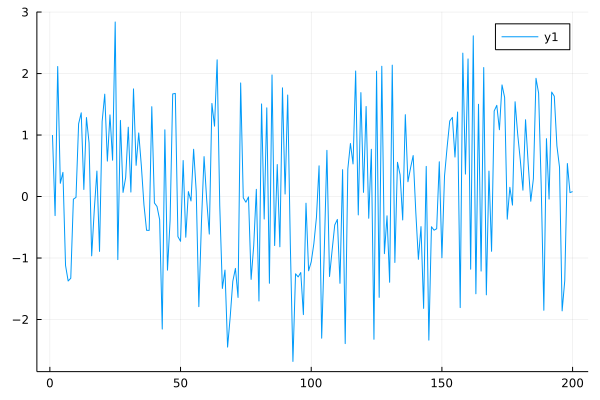

In [10]:
plot(y)

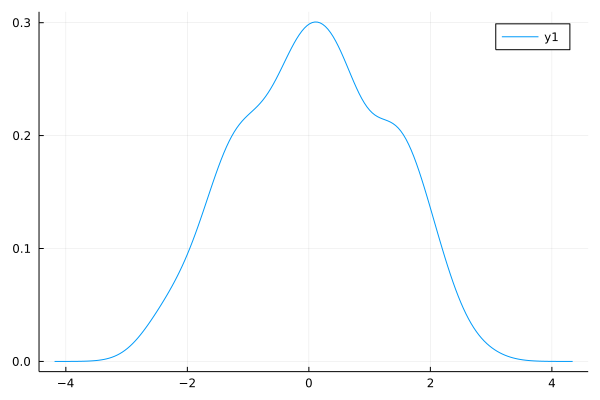

In [11]:
density(y)